# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Jocelyn Nathaniel Patricktan]
- **Email:** [jocelyn22002@mail.unpad.ac.id]
- **ID Dicoding:** [MC011D5X1268]

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi musim memengaruhi jumlah penyewaan sepeda?
- Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Data Wrangling merupakan sebuah proses yang meliputi pengumpulan data (Gathering Data), penilaian data (Assessing Data), serta pembersihan data (Cleaning Data) sebelum data digunakan dalam proses analisis data.

### Gathering Data  

Gathering Data adalah adalah tahap pertama dimana mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah yang ingin dihadapi. Data yang akan digunakan dalam proyek ini adalah Bike Sharing Dataset yang terdiri dari 2 tabel, yaitu tabel Day dan tabel Hour.

**Memuat tabel day**

In [62]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memuat tabel hour**

In [63]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Berdasarkan proses Gathering Data di atas, dapat terlihat bahwa saya menggunakan Bike Sharing Dataset yang terdiri dari tabel Day dan Hour dalam bentuk csv. Tabel Day untuk jumlah pengguna sepeda yang diagregasi per hari dengan catatan 17379 jam sedangkan tabel Hour untuk jumlah pengguna sepeda yang diagregasi per jam dengan catatan 731 hari.
-  Pada tahap ini, tabel Day dan Hour dimuat menjadi DataFrame dimana outputnya akan menampilkan 5 baris pertama dari DataFrame masing-masing tabel.

### Assessing Data

Assessing Data adalah tahap kedua dalam proses data wrangling dimana menilai kualitas dari seluruh data yang akan digunakan untuk melihat berbagai permasalahan yang ada di dalam data. Data yang digunakan adalah Day dan Hour.  

**Menilai Data day_df**

Memeriksa tipe data dan jumlah data dari setiap kolom DataFrame

In [64]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memeriksa jumlah duplikasi data dan memeriksa parameter statistik dari kolom numerik DataFrame

In [65]:
print("Jumlah duplikasi sebanyak: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi sebanyak:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Memeriksa jumlah missing value dari setiap kolom DataFrame

In [66]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Memeriksa jumlah nilai unik dari setiap kolom DataFrame

In [67]:
day_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


**Menilai data hour_df**

Memeriksa tipe data dan jumlah data dari setiap kolom DataFrame

In [68]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Memeriksa jumlah duplikasi data dan parameter statistik dari kolom numerik DataFrame

In [69]:
print("Jumlah duplikasi sebanyak: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi sebanyak:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Memeriksa jumlah missing value dari setiap kolom DataFrame

In [70]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


Memeriksa jumlah nilai unik dari setiap kolom DataFrame

In [71]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


**Insight:**
- Berdasarkan proses Assessing Data di atas, didapatkan bahwa untuk data day_df, tidak terdapat duplikasi data maupun missing value tetapi ketika menampilkan ringkasan parameter statistik dari kolom numerik  pada DataFrame day_df, terdapat keanehan pada nilai minimum kolom hum yang mungkin adanya *inaccurate value*. Masalah tersebut akan dibersihkan pada tahap cleaning data. Tidak hanya itu, tetapi juga terdapat kesalahan tipe data pada kolom dteday. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime64, bukan object.
- Untuk data hour_df pun tidak terdapat duplikasi data, missing value, maupun kesalahan pada ringkasan parameter statistik dari kolom numerik DataFrame tetapi terdapat kesalahan tipe data yang sama pada kolom dteday dimana seharusnya kolom tersebut direpresentasikan sebagai tipe data datetime64, bukan object.

### Cleaning Data

Cleaning Data merupakan proses terakhir dalam data wrangling dimana akan membersihkan berbagai masalah yang telah teridentifikasi dalam proses assessing data untuk memastikan tidak memengaruhi hasil analisis yang akan dilakukan nantinya.

**Membersihkan Data day_df**


Berdasarkan hasil proses assessing data, terdapat dua masalah yang dijumpai dalam day_df, yaitu inaccurate value dan kesalahan tipe data.



*  **Memperbaiki kesalahan tipe data**



Mengubah tipe data dari object menjadi datetime

In [72]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Menampilkan kembali jumlah data dan tipe data dari setiap kolom DataFrame untuk menunjukkan bahwa tipe data kolom dteday sudah diperbaiki

In [73]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa



* **Menangani inaccurate value**

Memfilter nilai minimum yang bernilai 0 pada kolom hum

In [74]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


Memeriksa distribusi kolom hum dengan histogram

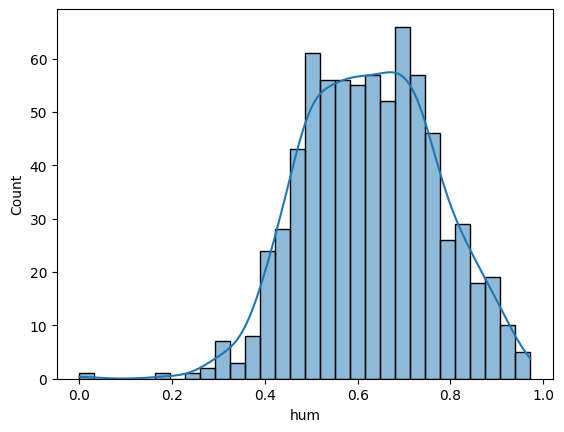

In [75]:
sns.histplot(day_df["hum"], bins=30, kde=True)
plt.show()

Memeriksa outlier menggunakan boxplot

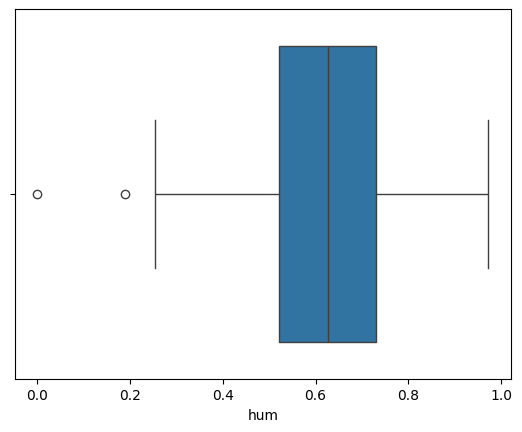

In [76]:
sns.boxplot(x=day_df["hum"])
plt.show()

Menangani nilai hum=0 dengan mengisi nilai median

In [77]:
median_hum = day_df.hum.median()
day_df.loc[day_df.hum == 0, "hum"] = median_hum

Menampilkan kembali parameter statistik dari setiap kolom Dataframe untuk menunjukkan bahwa nilai min kolom hum telah diperbaiki

In [78]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


Mengecek kembali apakah masih ada nilai hum=0

In [79]:
print(day_df[day_df["hum"] == 0])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Membersihkan Data hour_df**

Berdasarkan hasil proses assessing data, terdapat satu masalah yang dijumpai dalam hour_df, yaitu kesalahan tipe data.



*   **Memperbaiki kesalahan tipe data**


Mengubah tipe data dari object menjadi datetime

In [80]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Menampilkan kembali jumlah data dan tipe dari setiap kolom DataFrame untuk menunjukkan bahwa tipe data kolom dteday sudah diperbaiki

In [81]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berdasarkan Cleaning Data pada data day_df, dapat terlihat bahwa tipe data dteday sudah menjadi datetime64 yang sebelumnya object. Lalu, nilai minimum kolom hum juga sudah diperbaiki dengan mengambil nilai median.
- Untuk data hour_df juga sudah diperbaiki tipe data untuk kolom dteday yang dari object menjadi datetime64.
- Alasan saya menggunakan nilai median untuk memperbaiki nilai minimum hum pada data day_df adalah karena berdasarkan distribusi histogram di atas, arahnya cenderung condong ke kanan (right-skewed distribution) lalu ketika mengecek menggunakan boxplot, didapatkan bahwa terdapat outlier di bagian bawah box plot (termasuk nilai 0) sehingga menggunakan nilai median lebih aman dalam mengganti nilai 0.
- Alasan saya hanya memperbaiki nilai minimum hum pada data day_df sedangkan hour_df tidak adalah karena kelembaban udara hum=0 dalam data hour masih dapat diterima, bisa terjadi sesaat sedangkan kelembaban udara hum=0 dalam data day sangat tidak wajar, karena kelembapan 0% dalam satu hari penuh hampir mustahil sehingga kemungkinan besar nilai hum=0 pada data day adalah kesalahan pencatatan.  

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) adalah tahap dimana melakukan eksplorasi terhadap data yang telah dibersihkan untuk memperoleh insight dan menjawab pertanyaan analisis. Exploratory analysis merupakan proses analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data.

### **Eksplorasi Data day_df**

Menampilkan keseluruhan rangkuman parameter statistik dari setiap kolom DataFrame

In [82]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628751,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


Mengecek apakah nilai kolom cnt bersifat unik (tidak ada duplikasi) atau tidak

In [83]:
day_df.cnt.is_unique

False

Mengelompokkan data berdasarkan kolom musim untuk memahami sebaran peminjaman sepeda dan bulan-bulan dalam musim tertentu

In [84]:
day_df.groupby(by="season").agg({
    "cnt" : "nunique",
    "mnth" : ["max", "min", "mean", "std"]
})

cnt mnth                         
       nunique  max min       mean       std
season                                      
1          179   12   1   3.093923  3.403759
2          182    6   3   4.652174  0.951671
3          188    9   6   7.691489  0.948137
4          176   12   9  10.696629  0.919402

Mengeksplorasi variasi jumlah peminjaman sepeda berdasarkan hari dalam seminggu

In [85]:
day_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

,cnt
weekday,
0,104
1,104
2,104
5,104
3,103
4,103
6,102


Mengeksplorasi variasi jumlah peminjaman sepeda berdasarkan hari kerja

In [86]:
day_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

,cnt
workingday,
1,487
0,223


Mengeksplorasi variasi jumlah peminjaman sepeda berdasarkan kondisi cuaca

In [87]:
day_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

,cnt
weathersit,
1,451
2,243
3,21


Mengeksplorasi variasi jumlah peminjaman sepeda berdasarkan tahun

In [88]:
day_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False)

,cnt
yr,
1,356
0,352


Melihat bagaimana musim memengaruhi berbagai variabel numerik dalam dataset

In [89]:
day_df.groupby(by="season").agg(["mean","min", "max", "median", "std"])

instant                                                     dteday  \
              mean  min  max median         std                          mean   
season                                                                          
1       262.685083    1  731  366.0  212.113584 2011-09-19 16:26:31.160220928   
2       308.500000   80  537  308.5  185.421422 2011-11-04 12:00:00.000000000   
3       401.500000  172  631  401.5  185.494670 2012-02-05 12:00:00.000000000   
4       493.000000  266  720  493.0  185.315764 2012-05-07 00:00:00.000000000   

                                                                              \
              min        max              median                         std   
season                                                                         
1      2011-01-01 2012-12-31 2012-01-01 00:00:00 212 days 02:43:33.653758756   
2      2011-03-21 2012-06-20 2011-11-04 12:00:00 185 days 10:06:50.881450084   
3      2011-06-21 2012-09-22 2012-02-05 12:00:00 185 days 11:52:19.518011240   
4      2011-09-23 2012-12-20 2012-05-07 00:00:00 185 days 07:34:41.966819932   

        ...   registered                                          cnt        \
        ...         mean  min   max  median          std         mean   min   
season  ...                                                                   
1       ...  2269.204420  416  5315  1867.0  1200.269751  2604.132597   431   
2       ...  3886.233696  674  6456  3844.0  1353.375628  4992.331522   795   
3       ...  4441.691489  889  6917  4110.5  1304.626949  5644.303191  1115   
4       ...  3999.050562   20  6946  3815.0  1444.782557  4728.162921    22   

                                   
         max  median          std  
season                             
1       7836  2209.0  1399.942119  
2       8362  4941.5  1695.977235  
3       8714  5353.5  1459.800381  
4       8555  4634.5  1699.615261  

[4 rows x 75 columns]

Melihat bagaimana hari kerja memengaruhi berbagai variabel numerik dalam dataset

In [90]:
day_df.groupby(by="workingday").agg(["mean","min", "max", "median", "std"])

instant                              \
                 mean min  max median         std   
workingday                                          
0           367.34632   1  730  366.0  212.543359   
1           365.37800   3  731  366.0  210.737048   

                                  dteday                                   \
                                    mean        min        max     median   
workingday                                                                  
0          2012-01-02 08:18:42.077922048 2011-01-01 2012-12-30 2012-01-01   
1          2011-12-31 09:04:19.200000256 2011-01-03 2012-12-31 2012-01-01   

                                        ...   registered                     \
                                   std  ...         mean  min   max  median   
workingday                              ...                                   
0          212 days 13:02:26.235028360  ...  2959.034632  451  5966  2928.0   
1          210 days 17:41:20.931393012  ...  3978.250000   20  6946  3866.0   

                                 cnt                                  
                    std         mean  min   max  median          std  
workingday                                                            
0           1293.867686  4330.168831  605  8714  4459.0  2052.141245  
1           1568.692453  4584.820000   22  8362  4582.0  1878.415583  

[2 rows x 75 columns]

Melihat bagaimana kondisi cuaca memengaruhi berbagai variabel numerik dalam dataset

In [91]:
day_df.groupby(by="weathersit").agg(["mean","min", "max", "median", "std"])

instant                              \
                  mean min  max median         std   
weathersit                                           
1           368.544276   3  730  372.0  205.612488   
2           363.765182   1  731  361.0  223.181125   
3           336.190476  26  726  320.0  192.818987   

                                  dteday                                   \
                                    mean        min        max     median   
weathersit                                                                  
1          2012-01-03 13:03:45.485961216 2011-01-03 2012-12-30 2012-01-07   
2          2011-12-29 18:21:51.740890624 2011-01-01 2012-12-31 2011-12-27   
3          2011-12-02 04:34:17.142857216 2011-01-26 2012-12-26 2011-11-16   

                                        ...   registered                     \
                                   std  ...         mean  min   max  median   
weathersit                              ...                                   
1          205 days 14:41:58.985927582  ...  3912.755940  416  6946  3875.0   
2          223 days 04:20:49.199784008  ...  3348.510121  491  6844  3352.0   
3          192 days 19:39:20.511987444  ...  1617.809524   20  4324  1672.0   

                                 cnt                                  
                    std         mean  min   max  median          std  
weathersit                                                            
1           1533.347265  4876.786177  431  8714  4844.0  1879.483989  
2           1463.566884  4035.862348  605  8362  4040.0  1809.109918  
3           1068.290954  1803.285714   22  4639  1817.0  1240.284449  

[3 rows x 75 columns]

**Insight:**
- Berdasarkan rangkuman parameter statistik keseluruhan dataset day_df, terdapat 731 data yang mencakup periode dua tahun, yaitu 2011 dan 2012. Dari parameter di atas, diketahui bahwa jumlah penyewaan sepeda per hari (cnt) memiliki rata-rata sekitar 4504 unit dengan jumlah minimum 22 dan maksimum 8714 yang menunjukkan bahwa terdapat variasi besar dalam permintaan peminjaman. Jika dilihat dari jenis pengguna, rata-rata pengguna terdaftar (registered) jauh lebih banyak dibandingkan pengguna kasual (casual) dengan rata-rata masing-masing 3656 dan 848 penyewa per hari. Hal ini menunjukkan bahwa sebagian besar pelanggan merupakan pengguna yang sudah memiliki akun terdaftar. Dari segi musim (season), data mencakup keempat jenis musim dengan distribusi yang cukup merata, sedangkan untuk kondisi cuaca (weathersit) menunjukkan bahwa mayoritas hari berada dalam kondisi baik hingga mendung ringan tanpa adanya data cuaca ekstrem. Untuk kelembaban (hum) cenderung tinggi dengan rata-rata 63%, lalu sebagian besar data juga berasal dari hari kerja (workingday) dengan sedikit data pada hari libur(holiday).
- Berdasarkan eksplorasi yang dilakukan, ditemukan bahwa kolom cnt tidak bersifat unik yang berarti jumlah peminjaman sepeda  memiliki  nilai yang berulang pada beberapa hari tertentu. Saat data dikelompokkan berdasarkan musim (season) dan bulan (mnth), terlihat bahwa musim dingin memiliki rata-rata peminjaman tertinggi, yaitu sekitar 10.69 ribu sedangkan musim semi memiliki rata-rata terendah, yaitu 3.09 ribu. Hal ini mengindikasi bahwa cuaca atau faktor lain di musim dingin lebih mendukung pengguna sepeda dibandingkan musim semi. Selain itu, variasi peminjaman juga berbeda antar musim, di mana musim semi memiliki standar deviasi tertinggi (3.40) yang menunjukkan ketidakpastian lebih besar dalam pola peminjaman, sementara musim dingin memiliki variasi paling rendah (0.91) yang menandakan pola peminjaman lebih konsisten.
- Berdasarkan hasil eksplorasi data jumlah peminjaman berdasarkan hari dalam seminggu (weekday), ditermukan variasi jumlah unik peminjaman sepeda relatif stabil sepanjang minggu dengan nilai tertinggi pada hari senin, selasa, rabu, dan sabtu (masing-masing 104) serta nilai terendah pada hari minggu (102). Hal ini menunjukkan bahwa penggunaan sepeda tidak terlalu bergantung pada hari dalam seminggu, meskipun sedikit lebih rendah pada akhir pekan.
- Sementara, berdasarkan hari kerja (workingday) didapatkan bahwa jumlah unik peminjaman sepeda jauh lebih tinggi pada hari kerja (487) dibandingkan dengan hari libur (223). Pada analisis pengaruh hari kerja terhadap jumlah peminjaman sepeda (cnt), didapatkan rata-rata peminjaman pada hari kerja juga lebih tinggi (4584) dibandingkan hari libur yang hanya 4330. Hal ini menunjukkan bahwa penggunaan sepeda lebih banyak terkait dengan aktivitas harian seperti perjalanan menuju tempat kerja atau sekolah dibandingkan penggunaan rekreasi. Namun, standar deviasi pada hari kerja lebih kecil dibandingkan hari libur yang mengindikasikan bahwa pola peminjaman pada hari kerja lebih konsisten sementara pada hari libur lebih bervariasi. Nilai maksimum peminjaman juga lebih tinggi pada hari kerja (8362) dibandingkan hari libur (8714) meskipun selisihnya tidak begitu besar.
- Berdasarkan kondisi musim, didapatkan bahwa rata-rata peminjaman terendah pada musim semi (2604) dan tertinggi pada musim gugur (5644). Hal ini menunjukkan bahwa cuaca yang lebih sejuk mendorong lebih banyak penggunaan sepeda, sementara musim semi mungkin membatasi aktivitas bersepeda karena suhu yang masih cenderung rendah. Selain itu, musim dingin juga mencatat jumlah peminjaman yang tinggi bahkan dengan nilai maksimum peminjaman tertinggi (8555). Ini mengindikasikan bahwa meskipun musim gugur memiliki rata-rata peminjaman tertinggi, musim dingin juga merupakan periode dengan permintaan sepeda yang tinggi. Dari standar deviasi, terlihat bahwa variasi peminjaman cukup besar di seluruh musim dengan nilai tertinggi pada musim dingin (1699) yang menunjukkan bahwa pola peminjaman pada musim ini lebih fluktuatif dibandingkan musim lainnya.
- Berdasarkan kondisi cuaca, jumlah peminjaman sepeda sangat berpengaruh oleh kondisi cuaca. Cuaca cerah memiliki jumlah peminjaman terbanyak dengan 451 hari, diikuti dengan cuaca mendung dengan 243 hari, sementara cuaca buruk seperti hujan atau salju hanya terjadi selama 21 hari yang menunjukkan bahwa sangat sedikit orang yang meminjam sepeda saat kondisi cuaca tidak mendukung. Tidak hanya itu, tetapi juga didapatkan bahwa rata-rata jumlah peminjaman tertinggi terjadi saat cuaca cerah (4876), diikuti dengan cuaca mendung (4035), dan yang terendah terjadi saat cuaca buruk seperti hujan atau salju dengan rata-rata 1803. Hal ini menunjukkan bahwa kondisi cuaca juga menjadi faktor utama dalam menentukan jumlah peminjaman.  
- Berdasarkan tahun didapatkan bahwa jumlah penyewa sepeda cenderung stabil dengan tahun 2012 memiliki sedikit lebih banyak variasi peminjaman (356 hari) dibandingkan tahun 2011 (352 hari). Hal ini menunjukkan bahwa tren peminjaman dari tahun ke tahun tidak mengalami perubahan signifikan.



### **Eksplorasi Data hour_df**

Menampilkan keseluruhan rangkuman parameter statistik dari setiap kolom DataFrame

In [92]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Mengecek apakah nilai kolom cnt bersifat unik atau tidak

In [93]:
hour_df.cnt.is_unique

False

Mengelompokkan data berdasarkan kolom musim untuk memahami sebaran peminjaman sepeda dan bulan-bulan dalam musim tertentu

In [94]:
hour_df.groupby(by="season").agg({
    "cnt" : "nunique",
    "mnth" : ["max", "min", "mean", "std"]
})

cnt mnth                         
       nunique  max min       mean       std
season                                      
1          482   12   1   3.119755  3.411534
2          721    6   3   4.654117  0.948483
3          760    9   6   7.689724  0.946649
4          690   12   9  10.702505  0.918886

Mengeksplorasi variasi jumlah peminjaman sepeda berdasarkan hari kerja

In [95]:
hour_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

,cnt
workingday,
1,856
0,676


Mengeksplorasi variasi jumlah peminjaman sepeda berdasarkan kondisi cuaca

In [96]:
hour_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

,cnt
weathersit,
1,848
2,649
3,368
4,3


Mengeksplorasi variasi jumlah peminjaman sepeda berdasarkan tahun

In [97]:
hour_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False)

,cnt
yr,
1,866
0,585


Mengeksplorasi variasi jumlah peminjaman sepeda berdasarkan hari dalam seminggu

In [98]:
hour_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

,cnt
weekday,
3,616
6,609
4,606
2,598
1,595
5,584
0,571


Mengeksplorasi variasi jumlah peminjaman sepeda berdasarkan jam

In [99]:
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

,cnt
hr,
17,494
18,471
8,467
19,423
16,414
14,385
12,383
15,383
13,377


Melihat bagaimana musim memengaruhi berbagai variabel numerik dalam dataset

In [100]:
hour_df.groupby(by="season").agg(["mean", "min", "max", "median", "std" ])

instant                                     \
                mean   min    max   median          std   
season                                                    
1        6302.008015     1  17379   8698.5  5028.056396   
2        7287.727376  1808  12763  10559.0  4422.284512   
3        9526.588968  4011  15019  12771.5  4428.774214   
4       11655.779301  6251  17117   8366.5  4418.306229   

                              dteday                                   \
                                mean        min        max     median   
season                                                                  
1      2011-09-23 22:42:15.785007104 2011-01-01 2012-12-31 2012-01-03   
2      2011-11-04 16:20:47.629848064 2011-03-21 2012-06-20 2012-03-21   
3      2012-02-06 01:38:19.644128256 2011-06-21 2012-09-22 2012-06-21   
4      2012-05-05 12:02:02.495274240 2011-09-23 2012-12-20 2011-12-20   

                                    ...  registered                  \
                               std  ...        mean min  max median   
season                              ...                               
1      211 days 01:56:53.743539180  ...   96.823668   0  681   66.0   
2      184 days 21:43:20.112188018  ...  162.183488   0  782  128.0   
3      185 days 02:29:50.938418676  ...  185.729093   0  886  153.0   
4      184 days 21:13:27.453844812  ...  168.202032   0  876  134.0   

                           cnt                              
               std        mean min  max median         std  
season                                                      
1       104.347605  111.114569   1  801   76.0  119.224010  
2       152.751493  208.344069   1  957  165.0  188.362473  
3       166.430156  236.016237   1  977  199.0  197.711630  
4       157.559340  198.868856   1  967  155.5  182.967972  

[4 rows x 80 columns]

Melihat bagaimana hari kerja memengaruhi berbagai variabel numerik dalam dataset

In [101]:
hour_df.groupby(by="workingday").agg(["mean","min", "max", "median", "std"])

instant                                  \
                   mean min    max  median          std   
workingday                                                
0           8715.136017   1  17355  8668.5  5063.088910   
1           8678.318584  48  17379  8714.0  4995.651251   

                                  dteday                                   \
                                    mean        min        max     median   
workingday                                                                  
0          2012-01-03 05:02:09.270946816 2011-01-01 2012-12-30 2012-01-01   
1          2012-01-01 16:34:28.065739520 2011-01-03 2012-12-31 2012-01-03   

                                        ...  registered                  \
                                   std  ...        mean min  max median   
workingday                              ...                               
0          212 days 00:48:26.942611784  ...  123.963910   0  601   93.0   
1          209 days 03:52:26.022160044  ...  167.646439   0  886  127.0   

                               cnt                              
                   std        mean min  max median         std  
workingday                                                      
0           107.779533  181.405332   1  783  119.0  172.853832  
1           165.990865  193.207754   1  977  151.0  185.107477  

[2 rows x 80 columns]

Melihat bagaimana kondisi cuaca memengaruhi berbagai variabel numerik dalam dataset

In [102]:
hour_df.groupby(by="weathersit").agg(["mean","min", "max", "median", "std"])

instant                                   \
                   mean  min    max  median          std   
weathersit                                                 
1           8696.750723    1  17379  8715.0  4910.639765   
2           8828.604533    6  17376  8867.5  5296.123922   
3           8197.145877   19  17321  7716.0  4917.974369   
4           6188.333333  586   9124  8855.0  4853.626926   

                                  dteday                                   \
                                    mean        min        max     median   
weathersit                                                                  
1          2012-01-02 10:23:55.205467392 2011-01-01 2012-12-31 2012-01-03   
2          2012-01-08 00:25:02.112676096 2011-01-01 2012-12-31 2012-01-10   
3          2011-12-12 13:58:13.446088960 2011-01-01 2012-12-29 2011-11-23   
4          2011-09-19 00:00:00.000000000 2011-01-26 2012-01-21 2012-01-09   

                                        ...  registered                  \
                                   std  ...        mean min  max median   
weathersit                              ...                               
1          205 days 14:25:21.382692322  ...  164.323841   0  886  128.0   
2          221 days 19:29:31.048124120  ...  145.570202   0  822  111.0   
3          205 days 20:51:13.482604476  ...   95.523608   0  791   55.0   
4          204 days 11:16:52.035408158  ...   71.666667  22  158   35.0   

                               cnt                              
                   std        mean min  max median         std  
weathersit                                                      
1           156.890453  204.869272   1  977  159.0  189.487773  
2           142.390431  175.165493   1  957  133.0  165.431589  
3           114.773469  111.579281   1  891   63.0  133.781045  
4            75.048873   74.333333  23  164   36.0   77.925178  

[4 rows x 80 columns]

Menggabungkan dataset day_df dan hour_df berdasarkan kolom tanggal

In [103]:
day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)
day_hour_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengelompokkan data berdasarkan jam lalu menghitung berbagai statistik deskriptif untuk jumlah peminjaman sepeda serta musim

In [104]:
day_hour_df.groupby(by="hr").agg({
    "cnt_x": "nunique",
    "cnt_y": "nunique",
    "season_x": ["mean", "min", "max", "std"],
    "season_y": ["mean", "min", "max", "std"]
})

cnt_x   cnt_y  season_x                    season_y                  
   nunique nunique      mean min max       std      mean min max       std
hr                                                                        
0      692     162  2.500000   1   4  1.108898  2.500000   1   4  1.108898
1      690     120  2.497238   1   4  1.108869  2.497238   1   4  1.108869
2      681     100  2.511888   1   4  1.102994  2.511888   1   4  1.102994
3      666      60  2.539455   1   4  1.092796  2.539455   1   4  1.092796
4      666      25  2.552367   1   4  1.093567  2.552367   1   4  1.093567
5      683      58  2.513250   1   4  1.104286  2.513250   1   4  1.104286
6      691     187  2.497931   1   4  1.108261  2.497931   1   4  1.108261
7      693     374  2.496561   1   4  1.108284  2.496561   1   4  1.108284
8      693     467  2.496561   1   4  1.108284  2.496561   1   4  1.108284
9      693     322  2.496561   1   4  1.108284  2.496561   1   4  1.108284
10     693     312  2.496561   1   4  1.108284  2.496561   1   4  1.108284
11     693     337  2.496561   1   4  1.108284  2.496561   1   4  1.108284
12     694     383  2.494505   1   4  1.108910  2.494505   1   4  1.108910
13     694     377  2.496571   1   4  1.109550  2.496571   1   4  1.109550
14     694     385  2.496571   1   4  1.109550  2.496571   1   4  1.109550
15     694     383  2.496571   1   4  1.109550  2.496571   1   4  1.109550
16     695     414  2.494521   1   4  1.110171  2.494521   1   4  1.110171
17     695     494  2.494521   1   4  1.110171  2.494521   1   4  1.110171
18     693     471  2.495879   1   4  1.110155  2.495879   1   4  1.110155
19     693     423  2.495879   1   4  1.110155  2.495879   1   4  1.110155
20     693     360  2.495879   1   4  1.110155  2.495879   1   4  1.110155
21     693     294  2.495879   1   4  1.110155  2.495879   1   4  1.110155
22     693     252  2.495879   1   4  1.110155  2.495879   1   4  1.110155
23     693     196  2.495879   1   4  1.110155  2.495879   1   4  1.110155

**Insight:**
- Berdasarkan rangkuman parameter statistik keseluruhan dataset hour_df, terdapat 17379 yang mencatat peminjaman sepeda pada level jam. Distribusi musim menunjukkan rata-rata sekitar 2.5 yang berarti data tersebar cukup merata di antara empat musim. Dari segi tahun, nilai rata-rata menunjukkan 0.5 yang mengindikasikan bahwa data mencakup dua tahun dengan jumlah yang hampir seimbang. Untuk distribusi bulan memiliki nilai rata-rata 6.6 yang menunjukkan bahwa data lebih condong ke pertengahan tahun sedangkan jam menunjukkan rata-rata 11.5 yang menandakan bahwa aktivitas peminjaman lebih banyak terjadi di sekitar tengah hari yang cenderung meningkat di jam-jam sibuk seperti pagi dan sore. Dalam aspek hari kerja, didapatkan sebagian besar data sekitar 68% merupakan hari kerja. Dari kondisi cuaca, nilai rata-rata sekitar 1.42 yang menunjukkan bahwa kebanyakan peminjaman terjadi saat cuaca baik atau berawan. Untuk jumlah peminjaman sepeda per jam, rata-rata peminjaman sekitar 189 dengan standar deviasi 181 yang menunjukkan variabilitas tinggi dalam jumlah penyewa per jam. Nilai maksimum sebesar 977 sedangkan nilai minimum 1 yang menandakan adanya jam-jam permintaan sangat tinggi maupun sangat rendah.
- Berdasarkan eksplorasi data yang mengelompokkan jumlah peminjaman sepeda berdasarkan musim dan bulan, terlihat bahwa musim dengan peminjaman tertinggi adalah musim panas dengan 721 dengan diikuti oleh musim gugur dengan 760. Sementara, musim semi memiliki jumlah peminjaman unik paling sedikit dengan 482. Hal ini menunjukkan bahwa musim memiliki pengaruh terhadap jumlah peminjaman sepeda dengan peminjaman lebih tinggi pada musim-musim yang lebih hangat. Selain itu, distribusi bulan dalam setiap musim menunjukkan bahwa bulan dengan jumlah peminjaman tertinggi berada pada bulan desember di musim semi, september di musim gugur, dan desember di musim dingin dengan standar deviasi relatif kecil yang menandakan bahwa distrbusi bulan dalam setiap musim cukup stabil. Untuk musim panas, bulan dengan peminjaman tertinggi pada bulan juni.
- Berdasarkan eksplorasi jumlah peminjaman sepeda berdasarkan hari kerja, terlihat bahwa peminjaman lebih banyak terjadi pada hari kerja dengan 856 peminjaman unik dibandingkan dengan hari libur yang hanya memiliki 676 peminjaman. Hal ini menunjukkan bahwa sepeda lebih sering digunakan untuk keperluan sehari-hari pada hari kerja dibandingkan dengan rekreasi di hari pekan. Sementara itu, berdasarkan kondisi cuaca menunjukkan bahwa jumlah peminjaman tertinggi terjadi pada cuaca cerah atau berawan ringan dengan 848 peminjaman, diikuti oleh kondisi cuaca mendung dengan 649 peminjaman. Ketika cuaca lebih buruk seperti hujan atau salju ringan, jumlah peminjaman menurun menjadi 368 peminjaman. Peminjaman sepeda hampir tidak terjadi pada kondisi cuaca ekstrem seperti badai atau salju lebat dengan hanya 3 peminjaman yang tercatat.
- Berdasarkan eksplorasi jumlah peminjaman sepeda berdasarkan tahun, terlihat bahwa pada tahun 2012 jumlah peminjaman sepeda lebih tinggi dengan 866 peminjaman dibandingkan tahun 2011 dengan 585 peminjaman. Hal ini menunjukkan adanya peningkatan peminjaman sepeda dari tahun ke tahun. Sementara itu, analisis berdasarkan hari dalam seminggu menunjukkan bahwa jumlah peminjaman cukup bervariasi dengan jumlah tertinggi pada hari kamis dengan 616 peminjaman diikuti dengan hari minggu dengan 609 peminjaman dan hari jumat dengan 606  peminjaman. Peminjaman sepeda cukup konsisten sepanjang minggu tetapi sedikit lebih tinggi pada hari-hari kerja dibandingkan akhir pekan.
- Eksplorasi berdasarkan jam terlihat bahwa jam dengan peminjaman terbanyak adalah pukul 17:00 dengan 494 peminjaman diikuti oleh pukul 18:00 dengan 471 peminjaman dan pukul 08:00 dengan 467 peminjaman. Hal ini menunjukkan bahwa peminjaman sepeda mencapai puncaknya pada jam sibuk, yaitu pagi sekitar pukul 08:00 dengan kemungkinan orang berangkat kerja atau sekolah dan sore sekitar pukul 17:00 - 18:00 ketika waktu pulang kerja atau sekolah. Sementara itu, peminjaman sepeda lebih rendah pada malam hari dengan jumlah peminjaman menurun pada pukul 21:00 diikuti dengan pukul 23:00 yang hanya 196 peminjamn dan angka tersebut terus menurun hingga titik terendah pada pukul 03:00 - 05:00.
- Berdasarkan eksplorasi musim, dapat terlihat bahwa jumlah peminjaman sepeda cenderung berbeda tergantung musim dimana musim gugur memiliki jumlah peminjaman tertinggi dengan rata-rata 236 dan maksimum 977 peminjaman, diikuti dengan musim dingin dengan rata-rata 198 dan maksimum 967 peminjaman, dan musim semi menduduki posisi terendah dengan rata-rata 111 dan maksimal 801 peminjaman. Musim panas memiliki rata-rata 208 dengan maksimum 957 peminjaman. Sementara itu, berdasarkan hari kerja, didapatkan bahwa hari kerja memiliki rata-rata peminjaman 193 dengan maksimum 977 dan hari libur memiliki rata-rata 181 dan maksimum 783 peminjaman. Hal ini menunjukkan bahwa meskipun peminjaman lebih tinggi di hari kerja, perbedaannya tidak terlalu signifikan dibandingkan hari libur.
- Berdasarkan eksplorasi data kondisi cuaca terhadap jumlah peminjaman sepeda, terlihat bahwa cuaca cerah memiliki jumlah peminjaman tertinggi dengan rata-rata 204 dan maksimum 977 peminjaman diikuti dengan cuaca mendung atau berawan dengan rata-rata 175 dan maksimum 957 peminjaman dan cuaca buruk memilki rata-rata 111 dan maksimum 891 peminjaman. Cuaca ekstrem memiliki rata-rata 74 dan maksimum peminjaman hanya 164 yang mana jauh lebih rendah dibandingkan lainnya. Hal ini menunjukkan bahwa semakin buruk cuaca, semakin sedikit jumlah peminjaman sepeda.
- Berdasarkan eksplorasi pengelompokkan data berdasarkan jam dan menampilkan statistik deskriptif untuk jumlah peminjaman sepeda serta musim, didapatkan bahwa rata-rata jumlah peminjaman meningkat di beberapa jam tertentu yang mungkin di jam sibuk seperti pagi dan sore. Statistik deskriptif juga memperlihatkan bagaimana musim mempengaruhi pola peminjaman serta jumlah peminjaman berubah dari satu jam ke jam lainnya dimana dapat dengan melihat standar deviasi yang jika standar deviasi kecil maka akan menunjukkan konsistensi pola di beberapa jam, sementara jam lain mungkin memiliki variasi yang lebih besar.





## Visualization & Explanatory Analysis

Data Visualization adalah tahap dimana menerapkan berbagai teknik dan jenis visualisasi data yang tepat untuk mengkomunikasikan temuan atau insight dari hasil analisis secara efektif. Explanatory Analysis merupakan proses analisis data yang bertujuan untuk membagikan beberapa insight yang menarik dari sebuah data. Insight ini yang akan digunakan untuk menjawab pertanyaan yang dihadapi.

### Pertanyaan 1: Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?

Mengelompokkkan data dalam dataset hour_df berdasarkan kondisi cuaca

In [105]:
byweather_df = hour_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()

Mengelompokkkan data dalam dataset hour_df berdasarkan kondisi cuaca dan membuat visualisasi jumlah penyewaan sepeda berdasarkan kondisi cuaca dengan grafik batang

<ipython-input-106-b85ac60a640a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=byweather_df, palette=color)


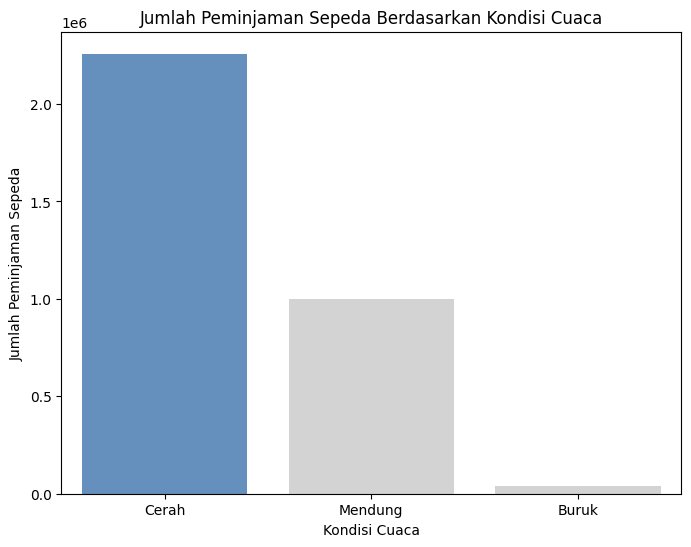

In [106]:
byweather_df = day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index()

weather_mapping = {1: "Cerah", 2: "Mendung", 3: "Buruk"}
byweather_df["weathersit"] = byweather_df["weathersit"].replace(weather_mapping)

highest_index = byweather_df["cnt"].idxmax()

color = ["lightgray"] * len(byweather_df)
color[highest_index] = "#578FCA"

plt.figure(figsize=(8, 6))
sns.barplot(x="weathersit", y="cnt", data=byweather_df, palette=color)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Kondisi Cuaca", loc="center", fontsize=12)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

Menampilkan 5 baris pertama dari DataFrame visualisasi jumlah penyewaan sepeda berdasarkan kondisi cuaca

In [107]:
byweather_df.head()

,weathersit,cnt
0,Cerah,2257952
1,Mendung,996858
2,Buruk,37869


### Pertanyaan 2: Bagaimana musim memengaruhi jumlah penyewaan sepeda?

Mengelompokkan data dalam dataset hour_df berdasarkan musim

In [108]:
byseason_df = hour_df.groupby(by="season").cnt.sum()

Mengelompokkkan data dalam dataset day_df berdasarkan musim dan membuat visualisasi jumlah penyewaan sepeda berdasarkan musim dengan grafik batang

<ipython-input-109-95367ba37aca>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


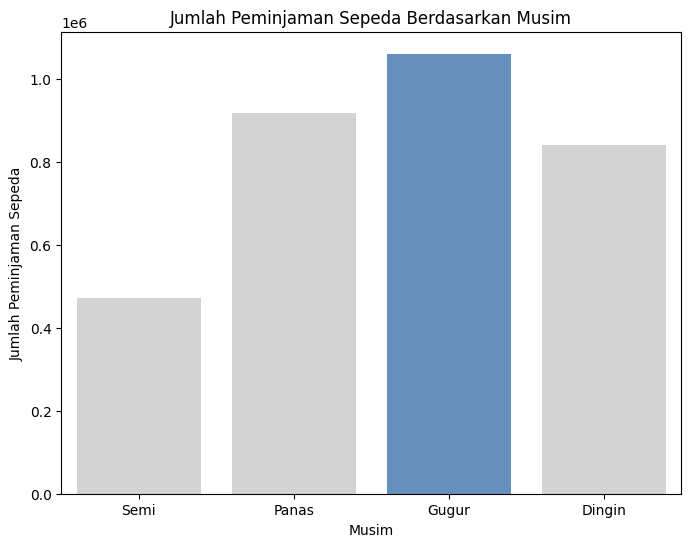

In [109]:
byseason_df = day_df.groupby(by="season").cnt.sum()

season_mapping = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}
byseason_df = byseason_df.reset_index()
byseason_df["season"] = byseason_df["season"].replace(season_mapping)

plt.figure(figsize=(8, 6))
sns.barplot(
    x="season",
    y="cnt",
    data=byseason_df,
    palette=["#578FCA" if s == byseason_df.loc[byseason_df["cnt"].idxmax(), "season"] else "lightgray" for s in byseason_df["season"]],
    order=byseason_df["season"]
)

plt.title("Jumlah Peminjaman Sepeda Berdasarkan Musim", loc="center", fontsize=12)
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

Menampilkan 5 baris pertama dari DataFrame visualisasi jumlah penyewaan sepeda berdasarkan musim

In [110]:
byseason_df = day_df.groupby(by="season").cnt.sum().sort_values(ascending=False).reset_index()
byseason_df.head()

,season,cnt
0,3,1061129
1,2,918589
2,4,841613
3,1,471348


**Insight:**
- Dari visualisasi berdasarkan kondisi cuaca di atas, didapatkan bahwa kondisi cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Saat cuaca cerah atau sedikit berawan, jumlah peminjaman sepeda mencapai angka tertinggi, yaitu 2257952 yang menunjukkan bahwa kondisi cuaca yang baik mendorong lebih banyak orang untuk bersepeda. Ketika cuaca mendung atau kabut berawan, jumlah peminjaman menurun drastis menjadi 996858 yang mengindikasikan bahwa meskipun masih memungkinkan untuk bersepeda, minat pengguna menurun cukup signifikan. Penurunan paling tajam terjadi saat cuaca salju tipis atau hujan ringan yang jumlah peminjaman hanya 37869 yang menunjukkan bahwa kondisi cuaca buruk sangat menghambat pengguna sepeda.
- Dari visualisasi berdasarkan musim di atas, didapatkan bahwa musim memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda. Musim gugur tercatat dengan jumlah peminjaman tertinggi dimana mencapai 1061129 peminjam yang menunjukkan bahwa suhu yang tidak begitu hangat dan tidak begitu dingin menjadi musim yang mendorong lebih banyak orang untuk menggunakan sepeda. Pada posisi kedua, musim panas memiliki sekitar 918589 yang masih cukup tinggi tetapi lebih rendah dibanding musim gugur dengan kemungkinan karena suhu yang cenderung hangat. Sementara itu, musim dingin mencatat jumlah peminjaman sepeda yang sediki lebih rendah (841613) dan musim semi menjadi musim dengan jumlah peminjaman paling sedikit (471348) yang kemungkinan besar disebabkan oleh perubahan cuaca yang signifikan yang membuat bersepeda menjadi kurang nyaman.  

## Conclusion

Conclusion adalah tahap akhir dari proyek analisis data dimana membuat kesimpulan dari hasil analisis yang dilakukan. Kesimpulan yang dibuat harus menjawab semua pertanyaan dan tujuan yang telah didefinisikan di awal.

- Berdasarkan analisis yang dilakukan pada pertanyaan pertama, dapat disimpulkan bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Terlihat bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada kondisi cuaca yang baik (cerah, sedikit awan, sebagian berawan). Sementara itu, jumlah penyewaan menurun saat cuaca menjadi kurang bersahabat (kabut + berawan, kabut + awan pecah, kabut + sedikit awan, kabut, salju tipis, hujan ringan + badai petir, awan berserakan, hujan ringan + awan berserakan, hujan lebat + palet es + badai petir + kabut, salju + kabut). Hal ini menunjukkan bahwa pengguna lebih memilih bersepeda ketika cuaca mendukung dan cenderung menghindari penggunaan sepeda saat cuaca buruk dan ekstrem.
- Berdasarkan analisis yang dilakukan pada pertanyaan kedua, dapat disimpulkan bahwa musim memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Ditemukan bahwa musim gugur mencatat jumlah penyewaan tertinggi, diikuti oleh musim panas dan musim dingin, sedangkan musim semi memiliki jumlah penyewaan paling sedikit. Hal ini menunjukkan bahwa suhu yang cenderung stabil dan lebih hangat mendorong lebih banyak orang untuk menggunakan sepeda di musim gugur maupun musim panas, sementara suhu dingin dan kemungkinan perubahan suhu yang signifikan di musim dingin dan musim semi mengurangi minat orang untuk bersepeda.
- Secara keseluruhan, dapat disimpulkan bahwa kondisi cuaca dan musim adalah faktor eksternal yang sangat memengaruhi jumlah penyewaan sepeda. Penyewaan sepeda cenderung meningkat ketika cuaca cerah dan musim yang stabil serta lebih hangat, sedangkan kondisi cuaca buruk serta musim dingin dan musim semi menyebabkan penurunan jumlah pengguna. Oleh karena itu, mungkin dari penyedia layanan penyewaan sepeda dapat mempertimbangkan pengoptimalan strategi operasional tersebut dengan meningkatkan sepeda di musim gugur dan musim panas serta menerapkan strategi pemasaran khusus di musim dingin atau saat kondisi cuaca kurang mendukung.